# Feature extraction for relationship prediction

In [1]:
%matplotlib inline
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from feature_extract import comm_feature_extract

plt.rcParams["figure.figsize"] = [12,6]

In [2]:
comm_df = pickle.load(open("../data/top_10_contacts.df", "rb"))
emm_df = pickle.load(open("../data/emm_raw.df", "rb"))

In [3]:
comm_features = comm_feature_extract(comm_df, emm_df)

## Regularity: comm days / total days ratio

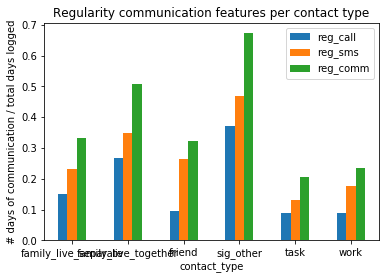

In [4]:
reg_feature_mean = comm_features.groupby('contact_type')[['reg_call', 'reg_sms', 'reg_comm']].mean()
reg_feature_mean.plot.bar(rot=0)
plt.title("Regularity communication features per contact type")
plt.ylabel("# days of communication / total days logged")
plt.show()

In [5]:
# Make sure to check NaNs to zeroes
comm_features.loc[comm_features['contact_type'] == 'task'][['reg_comm', 'reg_sms', 'total_sms_days']]

,reg_comm,reg_sms,total_sms_days
38,0.340000,0.300000,15.0
42,0.293103,0.293103,17.0
48,0.224138,0.224138,13.0
51,0.017544,0.000000,0.0
54,0.035088,0.000000,0.0
60,0.120000,0.000000,0.0
63,0.260000,0.000000,0.0
64,0.020000,0.000000,0.0
69,0.020000,0.000000,0.0
113,0.411765,0.411765,21.0


## Temporal tendency: time of day, day of week

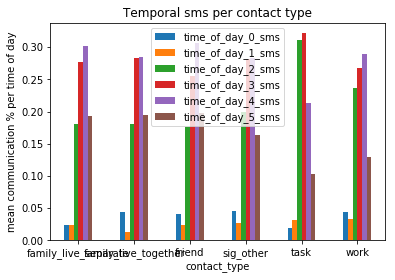

In [6]:
time_day_sms_mean = comm_features.groupby('contact_type')[['time_of_day_0_sms', 'time_of_day_1_sms', 'time_of_day_2_sms', 'time_of_day_3_sms', 'time_of_day_4_sms', 'time_of_day_5_sms']].mean()
time_day_sms_mean.plot.bar(rot=0)
plt.title("Temporal sms per contact type")
plt.ylabel("mean communication % per time of day")
plt.show()

## Channel selection: outgoing communication, total calls

In [7]:
comm_features.head()

,pid,combined_hash,total_comms,total_comm_days,contact_type,total_calls,total_sms,total_sms_days,total_call_days,total_days,...,time_of_day_3_sms,time_of_day_4_sms,time_of_day_5_sms,day_0_sms,day_1_sms,day_2_sms,day_3_sms,day_4_sms,day_5_sms,day_6_sms
0,1002060,10020601fd1800458f52e98066d10439852c6e9,34,19,family_live_separate,28.0,6.0,4.0,17.0,58,...,0.666667,0.000000,0.000000,0.166667,0.166667,0.000000,0.166667,0.500000,0.0,0.000000
1,1002060,100206037bc00d68a24a359c7e5c7fc0c7bf7b8,121,23,family_live_separate,46.0,75.0,17.0,19.0,58,...,0.333333,0.093333,0.013333,0.266667,0.213333,0.080000,0.160000,0.080000,0.2,0.000000
2,1002060,10020604218cb043a21e259b119816a7266934f,12,3,family_live_separate,8.0,4.0,2.0,3.0,58,...,0.000000,0.000000,0.250000,0.000000,0.500000,0.500000,0.000000,0.000000,0.0,0.000000
3,1002060,10020604dee72583ac5647caf9d876b53ca158c,76,10,family_live_separate,7.0,69.0,10.0,3.0,58,...,0.072464,0.188406,0.144928,0.014493,0.000000,0.550725,0.202899,0.144928,0.0,0.086957
4,1002060,1002060632572ef12203e84583c0cab0295337f,50,5,friend,2.0,48.0,5.0,1.0,58,...,0.625000,0.000000,0.000000,0.000000,0.125000,0.145833,0.041667,0.354167,0.0,0.333333


## Channel selection

In [10]:
comm_group = comm_df.groupby(['pid', 'combined_hash', 'comm_direction'], as_index=False).size().unstack(level=-1, fill_value=0)
comm_group = comm_group.reset_index()

comm_group[['pid', 'combined_hash','OUTGOING']]

temp_df = comm_features.merge(comm_group[['pid', 'combined_hash','OUTGOING']], on=['pid', 'combined_hash'], how='outer')
comm_features['out_comm'] = temp_df['OUTGOING'] / temp_df['total_comms']

comm_features['call_channel'] = comm_features['total_calls'] / comm_features['total_comms']
comm_features.head()

,pid,combined_hash,total_comms,total_comm_days,contact_type,total_calls,total_sms,total_sms_days,total_call_days,total_days,...,time_of_day_5_sms,day_0_sms,day_1_sms,day_2_sms,day_3_sms,day_4_sms,day_5_sms,day_6_sms,out_comm,call_channel
0,1002060,10020601fd1800458f52e98066d10439852c6e9,34,19,family_live_separate,28.0,6.0,4.0,17.0,58,...,0.000000,0.166667,0.166667,0.000000,0.166667,0.500000,0.0,0.000000,0.794118,0.823529
1,1002060,100206037bc00d68a24a359c7e5c7fc0c7bf7b8,121,23,family_live_separate,46.0,75.0,17.0,19.0,58,...,0.013333,0.266667,0.213333,0.080000,0.160000,0.080000,0.2,0.000000,0.578512,0.380165
2,1002060,10020604218cb043a21e259b119816a7266934f,12,3,family_live_separate,8.0,4.0,2.0,3.0,58,...,0.250000,0.000000,0.500000,0.500000,0.000000,0.000000,0.0,0.000000,0.416667,0.666667
3,1002060,10020604dee72583ac5647caf9d876b53ca158c,76,10,family_live_separate,7.0,69.0,10.0,3.0,58,...,0.144928,0.014493,0.000000,0.550725,0.202899,0.144928,0.0,0.086957,0.486842,0.092105
4,1002060,1002060632572ef12203e84583c0cab0295337f,50,5,friend,2.0,48.0,5.0,1.0,58,...,0.000000,0.000000,0.125000,0.145833,0.041667,0.354167,0.0,0.333333,0.460000,0.040000
